# Open Machine Learning in R

## Setup
* Register on OpenML.org to get your API key (on profile page)
* Install OpenML and set *your* key (only once)

In [2]:
devtools::install_github("openml/r")
library("OpenML")
setOMLConfig(apikey = hdigafkj8h2rn2iz27hn27f8uh5dn82zfg)

Loading required package: mlr
Loading required package: BBmisc
Loading required package: ggplot2
Loading required package: ParamHelpers


## Exploring datasets and tasks

### List known datasets

In [3]:
datasets = listOMLDataSets()  # fetches all data sets
datasets[1:20, c("did", "name", "NumberOfInstances", "NumberOfFeatures")]

,did,name,NumberOfInstances,NumberOfFeatures
1,1,anneal,898,39
2,2,anneal,898,39
3,3,kr-vs-kp,3196,37
4,4,labor,57,17
5,5,arrhythmia,452,280
6,6,letter,20000,17
7,7,audiology,226,70
8,8,liver-disorders,345,7
9,9,autos,205,26
10,10,lymph,148,19


### Search for specific datasets

In [4]:
# Search by name
subset(datasets, name == "eeg-eye-state")

,did,status,format,name,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
1177,1471,active,ARFF,eeg-eye-state,8257,-1,6723,2,15,14980,0,0,14,1


In [7]:
# Search by property
head(subset(datasets, NumberOfInstances > NumberOfFeatures))

,did,status,format,name,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
1,1,active,ARFF,anneal,684,10,0,6,39,898,0,0,6,33
2,2,active,ARFF,anneal,684,9,0,6,39,898,898,22175,6,33
3,3,active,ARFF,kr-vs-kp,1669,3,1527,2,37,3196,0,0,0,37
4,4,active,ARFF,labor,37,3,20,2,17,57,56,326,8,9
5,5,active,ARFF,arrhythmia,245,2,0,16,280,452,384,408,206,74
6,6,active,ARFF,letter,813,-1,734,26,17,20000,0,0,16,1


### Download datasets

In [7]:
eeg.data = getOMLDataSet(did = 1471L)
eeg.data
head(eeg.data$data)


Data Set "eeg-eye-state" :: (Version = 1, OpenML ID = 1471)
  Default Target Attribute: Class

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,1
5,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,1


### List known OpenML tasks

In [ ]:
tasks = listOMLTasks() # Fetches all tasks
head(tasks[, 1:5])

### Search for specific tasks

In [8]:
subset(tasks, name == "eeg-eye-state")[2:3,]

ERROR: Error in subset(tasks, name == "eeg-eye-state"): object 'tasks' not found


### Download OpenML tasks
* Includes dataset(s), target feature(s)
* Includes train/test splits (for clear comparison)

In [3]:
eeg.task = getOMLTask(task.id = 14951)  
eeg.task 

Task '14951' file 'task.xml' found in cache.
Task '14951' file 'datasplits.arff' found in cache.
Data '1471' file 'description.xml' found in cache.
Data '1471' file 'dataset.arff' found in cache.
Loading required package: readr



OpenML Task 14951 :: (Data ID = 1471)
  Task Type            : Supervised Classification
  Data Set             : eeg-eye-state :: (Version = 1, OpenML ID = 1471)
  Target Feature(s)    : Class
  Estimation Procedure : Stratified crossvalidation (1 x 10 folds)

Extract dataset from the task

In [4]:
mydata = eeg.task$input$data.set$data
head(mydata)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,1
5,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,1


## Running machine learning algorithms (with MLR)

In [5]:
library(mlr)
lrn = makeLearner("classif.rpart")
run.mlr = runTaskMlr(eeg.task, lrn)
run.mlr

Task: eeg-eye-state.task.14951, Learner: classif.rpart
[Resample] cross-validation iter: 1
[Resample] cross-validation iter: 2
[Resample] cross-validation iter: 3
[Resample] cross-validation iter: 4
[Resample] cross-validation iter: 5
[Resample] cross-validation iter: 6
[Resample] cross-validation iter: 7
[Resample] cross-validation iter: 8
[Resample] cross-validation iter: 9
[Resample] cross-validation iter: 10
[Resample] Result: acc.test.mean=0.707,timetrain.test.sum=2.21,timepredict.test.sum=0.031


$run

OpenML Run NA :: (Task ID = 14951, Flow ID = NA)

$bmr
                   task.id    learner.id acc.test.mean timetrain.test.sum
1 eeg-eye-state.task.14951 classif.rpart     0.7072096              2.207
  timepredict.test.sum
1                0.031

$flow

Flow "mlr.classif.rpart" :: (Version = NA, Flow ID = NA)
	External Version         : R_3.3.1-v2.e6a066f2
	Dependencies             : R_3.3.1, OpenML_1.0, mlr_2.8, rpart_4.1.10
	Number of Flow Parameters: 13
	Number of Flow Components: 0

attr(,"class")
[1] "OMLMlrRun"

### Upload the run to OpenML

In [6]:
setOMLConfig(verbosity = 0)

OpenML configuration:
  server           : http://www.openml.org/api/v1
  cachedir         : /Users/joa/.openml/cache
  verbosity        : 0
  arff.reader      : farff
  confirm.upload   : FALSE
  apikey           : ***************************0acb1

In [6]:
run.id = uploadOMLRun(run.mlr)

Flow already exists (Flow ID = 4148).
Uploading to 'http://www.openml.org/api/v1/run'.
Run successfully uploaded. Run ID: 1798178


### Easy benchmarking

In [10]:
task.ids = c(10,2382)  # List of OpenML task ID's
learners = list(
   makeLearner("classif.rpart"),
   makeLearner("classif.randomForest")
)
for (lrn in learners) {
    for (id in task.ids) {
      task = getOMLTask(id)
      res = runTaskMlr(task, lrn)
      run.id = uploadOMLRun(res)
    }
}

Task '10' file 'task.xml' found in cache.
Task '10' file 'datasplits.arff' found in cache.
Task: lymph.task.10, Learner: classif.rpart
[Resample] cross-validation iter: 1
[Resample] cross-validation iter: 2
[Resample] cross-validation iter: 3
[Resample] cross-validation iter: 4
[Resample] cross-validation iter: 5
[Resample] cross-validation iter: 6
[Resample] cross-validation iter: 7
[Resample] cross-validation iter: 8
[Resample] cross-validation iter: 9
[Resample] cross-validation iter: 10
[Resample] Result: acc.test.mean=0.79,timetrain.test.sum=0.147,timepredict.test.sum=0.099
Flow already exists (Flow ID = 4148).
Uploading to 'http://www.openml.org/api/v1/run'.
Run successfully uploaded. Run ID: 1810069
Task '2382' file 'task.xml' found in cache.
Task '2382' file 'datasplits.arff' found in cache.
Task: wine.task.2382, Learner: classif.rpart
[Resample] cross-validation iter: 1
[Resample] cross-validation iter: 2
[Resample] cross-validation iter: 3
[Resample] cross-validation iter: 4


## Downloading and comparing evaluations
* Download everyone's results (evaluated by the OpenML server)
* Filter by task, flow, user, or study ID

In [7]:
run.results = listOMLRunEvaluations(task.id = 14951)
head(run.results)

,run.id,task.id,setup.id,flow.id,area.under.roc.curve,area.under.roc.curve.array,average.cost,confusion.matrix,f.measure,f.measure.array,⋯,root.mean.prior.squared.error,root.mean.squared.error,root.relative.squared.error,total.cost,usercpu.time.millis,usercpu.time.millis.testing,usercpu.time.millis.training,os.information,scimark.benchmark,scimark.benchmark.array
1,544246,14951,2961,2390,0.693537,"[0.693537,0.693537]",0,"[[6829,1428],[2958,3765]]",0.700826,"[0.756928,0.631923]",⋯,0.497371,0.541101,1.087921,0,1.743,0.031,1.712,NA,NA,NA
2,544272,14951,2963,2393,0.934923,"[0.934923,0.934923]",0,"[[7918,339],[599,6124]]",0.937251,"[0.94408,0.928864]",⋯,0.497371,0.250234,0.503112,0,513.130,4.780,508.350,NA,NA,NA
3,544274,14951,5538,3401,0.992349,"[0.992349,0.992349]",0,"[[8019,238],[389,6334]]",0.958096,"[0.962376,0.952839]",⋯,0.497371,0.179762,0.361424,0,38875.000,1671.875,37203.125,"[Oracle Corporation, 1.8.0_45, amd64, Windows 8.1, 6.3]",1433.743,"[772.8137632186107, 1186.9140871273323, 653.9231730770091, 1310.065014968779, 3244.99907038474]"
4,544316,14951,3526,2629,0.965265,"[0.965265,0.965265]",0,"[[7806,451],[1060,5663]]",0.898533,"[0.911756,0.882293]",⋯,0.497371,0.283324,0.569642,0,NA,NA,NA,NA,NA,NA
5,544318,14951,3526,2629,0.963992,"[0.963992,0.963992]",0,"[[7821,436],[1101,5622]]",0.896713,"[0.91053,0.879743]",⋯,0.497371,0.285358,0.573732,0,NA,NA,NA,NA,NA,NA
6,544325,14951,5539,2277,0.979674,"[0.979674,0.979674]",0,"[[7863,394],[723,6000]]",0.925227,"[0.933682,0.914843]",⋯,0.497371,0.267943,0.538718,0,7062.500,812.500,6250.000,"[Oracle Corporation, 1.8.0_45, amd64, Windows 8.1, 6.3]",1458.286,"[863.4854734998407, 1223.4634601020418, 656.3214412156806, 1354.3993619867172, 3193.7623346357354]"


### List known flows

In [8]:
flows = listOMLFlows()
flows[1750:1800, 1:4]

,flow.id,full.name,name,version
1750,2293,classif.J48(20),classif.J48,20
1751,2294,classif.JRip(7),classif.JRip,7
1752,2295,classif.LiblineaRL1LogReg(4),classif.LiblineaRL1LogReg,4
1753,2296,classif.LiblineaRL2LogReg(4),classif.LiblineaRL2LogReg,4
1754,2297,classif.OneR(4),classif.OneR,4
1755,2298,classif.PART(4),classif.PART,4
1756,2299,classif.ada(5),classif.ada,5
1757,2300,classif.avNNet(5),classif.avNNet,5
1758,2301,classif.bartMachine(3),classif.bartMachine,3
1759,2302,classif.bdk(3),classif.bdk,3


### Compare against the state-of-the-art

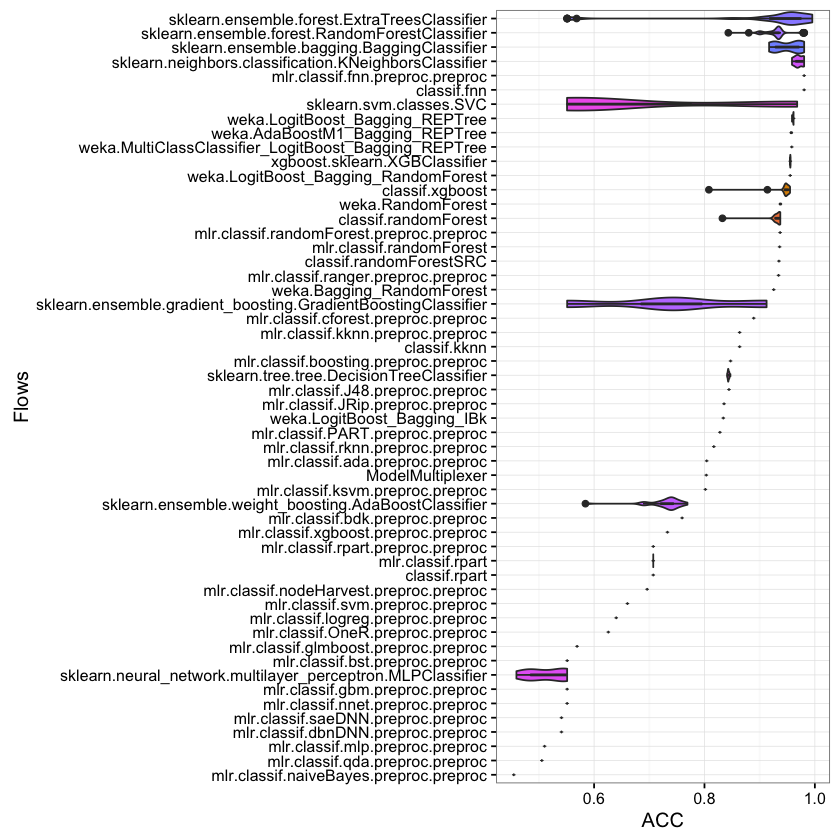

In [9]:
plotdata = run.results[,c("flow.id", "predictive.accuracy")]
plotdata$flow.id = flows$name[match(plotdata$flow.id, flows$flow.id)] # Replace IDs by names
colnames(plotdata) = c("algo","ACC")
ggplot(data = plotdata, mapping = aes(x = reorder(as.factor(algo), ACC, max), y = ACC, fill = algo)) +
    geom_violin(trim = TRUE, scale = "width") + geom_boxplot(width = 0.1) + scale_y_continuous(limits = c(0.45, 1)) +
    theme_bw() + theme(legend.position="none") + ylab("ACC") + xlab("Flows") + coord_flip()